## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
#Keras imports
import tensorflow as tf
import tensorflow.keras.preprocessing as preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from PIL import Image

Using TensorFlow backend.


## Pathways

In [2]:
not_path = os.listdir("../Data/Images")
not_path.remove(".DS_Store") #it likes to pop up from time to time

data_path = os.path.join('..', 'Data')

train_dir = os.path.join(data_path, 'ExModeling_train')
test_dir = os.path.join(data_path, 'ExModeling_test')
val_dir = os.path.join(data_path, 'ExModeling_val')

Ex_test_path = os.path.join(data_path, 'ExModeling_test')
Ex_train_path = os.path.join(data_path, 'ExModeling_train')
Ex_val_path = os.path.join(data_path, 'ExModeling_val')

## vis method

In [3]:
def vis_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

## Modeling

In [4]:
img_size = (452, 411) #avg training image size, img gen is fine but model does not like the tuple for some reason keep pecking at it
bch_size = 20

In [5]:
img_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=False)

train_generator = img_gen.flow_from_directory(
    train_dir,
    target_size=(img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical')

validation_generator = img_gen.flow_from_directory(
    val_dir, 
    target_size=(img_size), 
    color_mode='rgb',
    batch_size=bch_size, 
    class_mode='categorical')

test_generator = img_gen.flow_from_directory(
    test_dir,
    target_size=(img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical',
    shuffle=False)

Found 752 images belonging to 4 classes.
Found 98 images belonging to 4 classes.
Found 92 images belonging to 4 classes.


The main changes here are going to be a better fitting image size and more epochs than the prior iterations of this model. A better fitting image size will in theory make the model better at assessing the images and I want to use more epochs as it did not seem quite done learning after 10 last time.

In [6]:
alpha = models.Sequential() 
alpha.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(452, 411, 3)))
alpha.add(layers.Conv2D(64, (3, 3), activation='relu'))
alpha.add(layers.MaxPooling2D((2, 2)))
alpha.add(layers.Conv2D(128, (3, 3), activation='relu'))
alpha.add(layers.MaxPooling2D((2, 2)))
alpha.add(layers.Conv2D(128, (3, 3)))
alpha.add(layers.MaxPooling2D((2, 2)))
alpha.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
alpha.add(layers.MaxPooling2D((2, 2)))
alpha.add(layers.Flatten())
alpha.add(layers.Dense(64, activation='relu'))
alpha.add(layers.Dense(64, activation='relu'))
alpha.add(layers.Dense(128, activation='relu',))
alpha.add(layers.Dense(4, activation='softmax'))

alpha.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_alpha = alpha.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15, 
    validation_data=validation_generator,
    validation_steps=50)

W1022 20:33:06.311758 4725431744 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1022 20:33:06.345934 4725431744 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1022 20:33:06.353985 4725431744 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1022 20:33:06.410812 4725431744 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.m

Epoch 1/15
100/100 [==============================] - 8330s 83s/step - loss: 47.2761 - acc: 0.4052 - val_loss: 35.2329 - val_acc: 0.3878
Epoch 2/15
100/100 [==============================] - 2989s 30s/step - loss: 25.9263 - acc: 0.5782 - val_loss: 17.7986 - val_acc: 0.6327
Epoch 3/15
100/100 [==============================] - 1849s 18s/step - loss: 11.9269 - acc: 0.6545 - val_loss: 7.1291 - val_acc: 0.6429
Epoch 4/15
100/100 [==============================] - 1832s 18s/step - loss: 4.2523 - acc: 0.6932 - val_loss: 2.3080 - val_acc: 0.6531
Epoch 5/15
100/100 [==============================] - 1814s 18s/step - loss: 1.6863 - acc: 0.6940 - val_loss: 1.4160 - val_acc: 0.6531
Epoch 6/15
100/100 [==============================] - 1862s 19s/step - loss: 1.1794 - acc: 0.7492 - val_loss: 1.7015 - val_acc: 0.5306
Epoch 7/15
100/100 [==============================] - 1842s 18s/step - loss: 1.0284 - acc: 0.7725 - val_loss: 1.2681 - val_acc: 0.6327
Epoch 8/15
100/100 [==============================

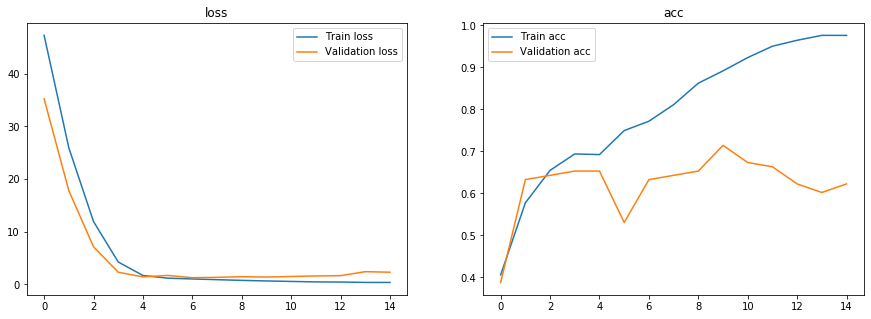

In [8]:
vis_history(history_alpha)

Perhaphs the extra 5 epochs caused more harm than good and led to some overfitting after epoch 10. I'll try this again. After that I'll try something else out.

In [10]:
beta = models.Sequential() 
beta.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(452, 411, 3)))
beta.add(layers.Conv2D(64, (3, 3), activation='relu'))
beta.add(layers.MaxPooling2D((2, 2)))
beta.add(layers.Conv2D(128, (3, 3), activation='relu'))
beta.add(layers.MaxPooling2D((2, 2)))
beta.add(layers.Conv2D(128, (3, 3)))
beta.add(layers.MaxPooling2D((2, 2)))
beta.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
beta.add(layers.MaxPooling2D((2, 2)))
beta.add(layers.Flatten())
beta.add(layers.Dense(64, activation='relu'))
beta.add(layers.Dense(64, activation='relu'))
beta.add(layers.Dense(128, activation='relu',))
beta.add(layers.Dense(4, activation='softmax'))

beta.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_beta = beta.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 2721s 27s/step - loss: 47.2598 - acc: 0.4133 - val_loss: 35.0263 - val_acc: 0.5602
Epoch 2/10
100/100 [==============================] - 1888s 19s/step - loss: 25.8409 - acc: 0.6147 - val_loss: 17.7817 - val_acc: 0.5918
Epoch 3/10
100/100 [==============================] - 2043s 20s/step - loss: 11.8881 - acc: 0.6732 - val_loss: 7.1824 - val_acc: 0.6673
Epoch 4/10
100/100 [==============================] - 1863s 19s/step - loss: 4.2498 - acc: 0.6978 - val_loss: 2.3909 - val_acc: 0.6459
Epoch 5/10
100/100 [==============================] - 2109s 21s/step - loss: 1.6672 - acc: 0.7090 - val_loss: 1.5210 - val_acc: 0.6714
Epoch 6/10
100/100 [==============================] - 1820s 18s/step - loss: 1.2149 - acc: 0.7308 - val_loss: 1.3102 - val_acc: 0.6602
Epoch 7/10
100/100 [==============================] - 1854s 19s/step - loss: 1.0384 - acc: 0.7570 - val_loss: 1.3336 - val_acc: 0.6429
Epoch 8/10
100/100 [==============================

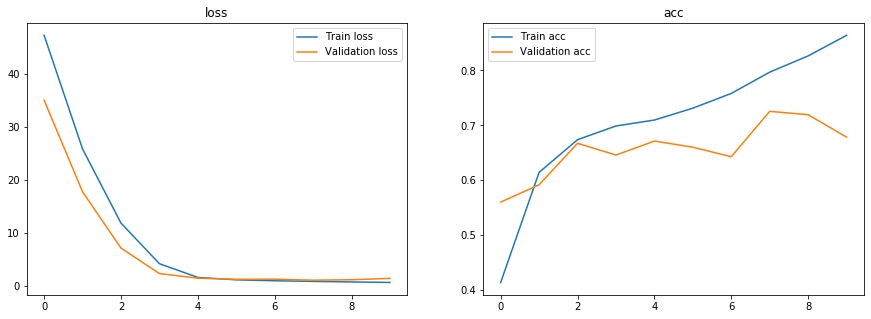

In [12]:
vis_history(history_beta)

In [17]:
charley = models.Sequential() 
charley.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(452, 411, 3)))
charley.add(layers.Conv2D(64, (3, 3), activation='relu'))
charley.add(layers.MaxPooling2D((2, 2)))
charley.add(layers.Conv2D(128, (3, 3), activation='relu'))
charley.add(layers.MaxPooling2D((2, 2)))
charley.add(layers.Conv2D(128, (3, 3)))
charley.add(layers.MaxPooling2D((2, 2)))
charley.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
charley.add(layers.MaxPooling2D((2, 2)))
charley.add(layers.Flatten())
charley.add(layers.Dense(64, activation='relu'))
charley.add(layers.Dense(64, activation='relu'))
charley.add(layers.Dense(128, activation='relu',))
charley.add(layers.Dense(4, activation='softmax'))

charley.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_charley = charley.fit_generator(
    train_generator,
    steps_per_epoch=125,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
125/125 [==============================] - 2218s 18s/step - loss: 45.5073 - acc: 0.4384 - val_loss: 30.7076 - val_acc: 0.6357
Epoch 2/10
125/125 [==============================] - 2191s 18s/step - loss: 20.5702 - acc: 0.6191 - val_loss: 11.9590 - val_acc: 0.7143
Epoch 3/10
125/125 [==============================] - 2206s 18s/step - loss: 6.8941 - acc: 0.6796 - val_loss: 3.2437 - val_acc: 0.7020
Epoch 4/10
125/125 [==============================] - 2197s 18s/step - loss: 2.0795 - acc: 0.7092 - val_loss: 1.5607 - val_acc: 0.7163
Epoch 5/10
125/125 [==============================] - 2207s 18s/step - loss: 1.3258 - acc: 0.7332 - val_loss: 1.3228 - val_acc: 0.7122
Epoch 6/10
125/125 [==============================] - 2199s 18s/step - loss: 1.0478 - acc: 0.7836 - val_loss: 1.3215 - val_acc: 0.6959
Epoch 7/10
125/125 [==============================] - 2216s 18s/step - loss: 0.8878 - acc: 0.8204 - val_loss: 1.2854 - val_acc: 0.6796
Epoch 8/10
125/125 [==============================]

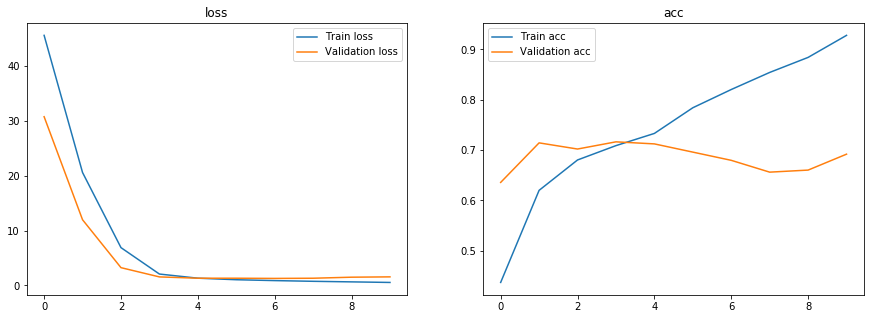

In [18]:
vis_history(history_charley)

In [20]:
test_loss, test_acc = charley.evaluate_generator(test_generator, steps=50)
print(test_acc, test_loss)

0.6413043504175933 1.5508312142413596


In [21]:
charley_ = models.Sequential() 
charley_.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(452, 411, 3)))
charley_.add(layers.Conv2D(64, (3, 3), activation='relu'))
charley_.add(layers.MaxPooling2D((2, 2)))
charley_.add(layers.Conv2D(128, (3, 3), activation='relu'))
charley_.add(layers.MaxPooling2D((2, 2)))
charley_.add(layers.Conv2D(128, (3, 3)))
charley_.add(layers.MaxPooling2D((2, 2)))
charley_.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
charley_.add(layers.MaxPooling2D((2, 2)))
charley_.add(layers.Flatten())
charley_.add(layers.Dense(64, activation='relu'))
charley_.add(layers.Dense(64, activation='relu'))
charley_.add(layers.Dense(128, activation='relu',))
charley_.add(layers.Dense(4, activation='softmax'))

charley_.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_charley_ = charley_.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 1832s 18s/step - loss: 48.3754 - acc: 0.4473 - val_loss: 35.7513 - val_acc: 0.6276
Epoch 2/10
100/100 [==============================] - 1821s 18s/step - loss: 26.2941 - acc: 0.6388 - val_loss: 18.1423 - val_acc: 0.5663
Epoch 3/10
100/100 [==============================] - 1851s 19s/step - loss: 11.9780 - acc: 0.6845 - val_loss: 7.1540 - val_acc: 0.6898
Epoch 4/10
100/100 [==============================] - 1801s 18s/step - loss: 4.3149 - acc: 0.6915 - val_loss: 2.6191 - val_acc: 0.5735
Epoch 5/10
100/100 [==============================] - 1831s 18s/step - loss: 1.6893 - acc: 0.7210 - val_loss: 1.5606 - val_acc: 0.6541
Epoch 6/10
100/100 [==============================] - 1835s 18s/step - loss: 1.1981 - acc: 0.7543 - val_loss: 1.3032 - val_acc: 0.6500
Epoch 7/10
100/100 [==============================] - 1849s 18s/step - loss: 1.0145 - acc: 0.7692 - val_loss: 1.2702 - val_acc: 0.6531
Epoch 8/10
100/100 [==============================

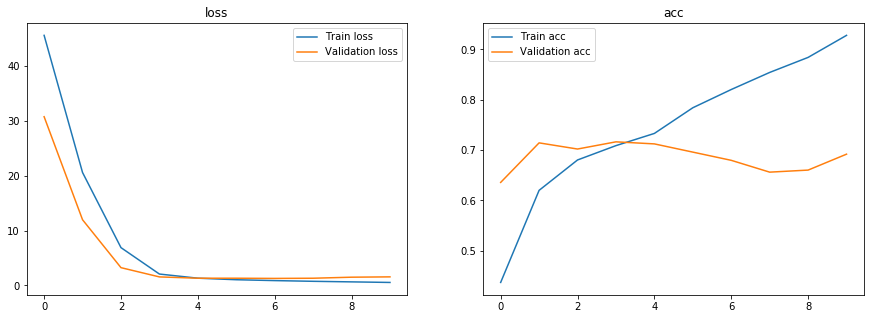

In [24]:
vis_history(history_charley)

In [25]:
delta = models.Sequential() 
delta.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(452, 411, 3)))
delta.add(layers.Conv2D(64, (3, 3), activation='relu'))
delta.add(layers.MaxPooling2D((2, 2)))
delta.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
delta.add(layers.MaxPooling2D((2, 2)))
delta.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
delta.add(layers.MaxPooling2D((2, 2)))
delta.add(layers.Flatten())
delta.add(layers.Dense(64, activation='relu'))
delta.add(layers.Dense(64, activation='relu'))
delta.add(layers.Dense(128, activation='relu',))
delta.add(layers.Dense(4, activation='softmax'))

delta.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_delta = delta.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 2000s 20s/step - loss: 66.8883 - acc: 0.3870 - val_loss: 51.1992 - val_acc: 0.6163
Epoch 2/10
100/100 [==============================] - 2009s 20s/step - loss: 39.5056 - acc: 0.5432 - val_loss: 28.9785 - val_acc: 0.6296
Epoch 3/10
100/100 [==============================] - 2030s 20s/step - loss: 21.2411 - acc: 0.6080 - val_loss: 14.6125 - val_acc: 0.5684
Epoch 4/10
100/100 [==============================] - 2021s 20s/step - loss: 10.1715 - acc: 0.6490 - val_loss: 6.9198 - val_acc: 0.5980
Epoch 5/10
100/100 [==============================] - 1918s 19s/step - loss: 5.2810 - acc: 0.6725 - val_loss: 4.1508 - val_acc: 0.6827
Epoch 6/10
100/100 [==============================] - 1931s 19s/step - loss: 3.3814 - acc: 0.7027 - val_loss: 2.9937 - val_acc: 0.6531
Epoch 7/10
100/100 [==============================] - 1942s 19s/step - loss: 2.5749 - acc: 0.7328 - val_loss: 2.4911 - val_acc: 0.6847
Epoch 8/10
100/100 [============================

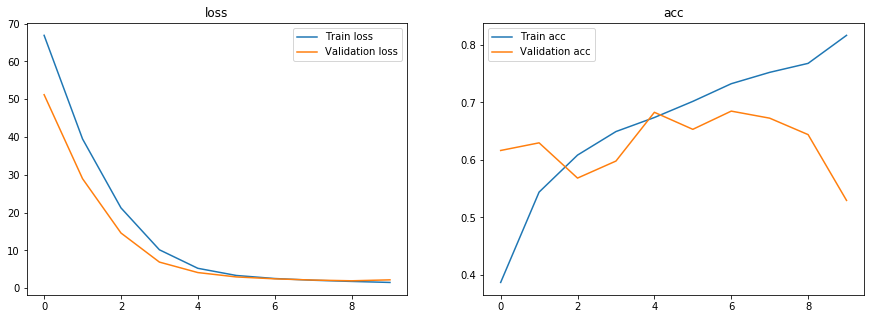

In [27]:
vis_history(history_delta)

In [28]:
test_loss, test_acc = delta.evaluate_generator(test_generator, steps=50)
print(test_acc, test_loss)

0.5326086917649144 2.174467770949654


In [30]:
echo = models.Sequential() 
echo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(452, 411, 3)))
echo.add(layers.Conv2D(64, (3, 3), activation='relu'))
echo.add(layers.MaxPooling2D((2, 2)))
echo.add(layers.Conv2D(128, (3, 3)))
echo.add(layers.MaxPooling2D((2, 2)))
echo.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
echo.add(layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
echo.add(layers.MaxPooling2D((2, 2)))
echo.add(layers.Flatten())
echo.add(layers.Dense(32, activation='relu'))
echo.add(layers.Dense(64, activation='relu'))
echo.add(layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
echo.add(layers.Dense(4, activation='softmax'))

echo.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_echo = echo.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 3580s 36s/step - loss: 173.8931 - acc: 0.3712 - val_loss: 115.3610 - val_acc: 0.4388
Epoch 2/10
100/100 [==============================] - 3512s 35s/step - loss: 75.1760 - acc: 0.4575 - val_loss: 42.0708 - val_acc: 0.5510
Epoch 3/10
100/100 [==============================] - 3510s 35s/step - loss: 24.6978 - acc: 0.5095 - val_loss: 13.9604 - val_acc: 0.6224
Epoch 4/10
100/100 [==============================] - 3485s 35s/step - loss: 10.4493 - acc: 0.5655 - val_loss: 8.0701 - val_acc: 0.6735
Epoch 5/10
100/100 [==============================] - 3568s 36s/step - loss: 7.4670 - acc: 0.6143 - val_loss: 7.0521 - val_acc: 0.5918
Epoch 6/10
100/100 [==============================] - 3521s 35s/step - loss: 6.6206 - acc: 0.6670 - val_loss: 6.4096 - val_acc: 0.6429
Epoch 7/10
100/100 [==============================] - 3498s 35s/step - loss: 6.0073 - acc: 0.6855 - val_loss: 5.8116 - val_acc: 0.6429
Epoch 8/10
100/100 [==========================

0.5760869422684545 4.88006415574447


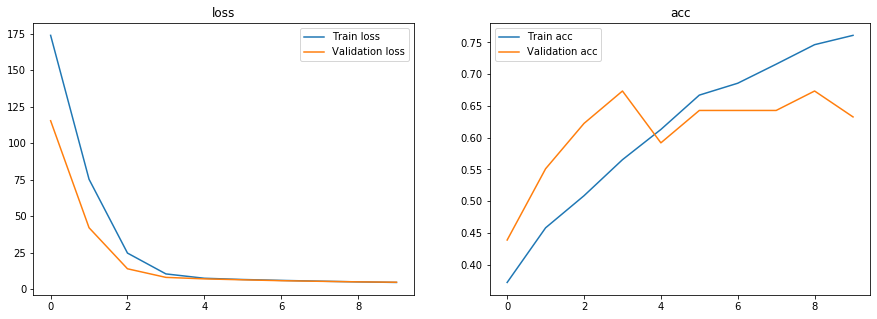

In [31]:
vis_history(history_echo)
test_loss, test_acc = echo.evaluate_generator(test_generator, steps=50)
print(test_acc, test_loss)


In [ ]:
from keras.layers import BatchNormalization

fox = models.Sequential() 
fox.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(452, 411, 3)))
fox.add(layers.Conv2D(64, (3, 3), activation='relu'))
fox.add(BatchNormalization())
fox.add(layers.MaxPooling2D((2, 2)))
fox.add(layers.Conv2D(128, (3, 3)))
fox.add(BatchNormalization())
fox.add(layers.MaxPooling2D((2, 2)))
fox.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
fox.add(BatchNormalization())
fox.add(layers.MaxPooling2D((2, 2)))
fox.add(layers.Flatten())
fox.add(layers.Dense(32, activation='relu'))
fox.add(BatchNormalization())
fox.add(layers.Dense(64, activation='relu'))
fox.add(BatchNormalization())
fox.add(layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
fox.add(BatchNormalization())
fox.add(layers.Dense(4, activation='softmax'))

fox.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_fox = fox.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

W1025 12:42:42.232176 4515827136 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1025 12:42:42.266149 4515827136 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1025 12:42:42.272893 4515827136 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1025 12:42:42.407809 4515827136 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_d

Epoch 1/10
100/100 [==============================] - 5270s 53s/step - loss: 60.2073 - acc: 0.5180 - val_loss: 48.5872 - val_acc: 0.5480
Epoch 2/10
100/100 [==============================] - 4613s 46s/step - loss: 39.0193 - acc: 0.7092 - val_loss: 31.0036 - val_acc: 0.5112
Epoch 3/10
100/100 [==============================] - 5821s 58s/step - loss: 24.4425 - acc: 0.8215 - val_loss: 20.2212 - val_acc: 0.4031
Epoch 4/10
  5/100 [>.............................] - ETA: 1:28:26 - loss: 19.1919 - acc: 0.8600